In [1]:
from mnist_load import *
from kernel import *
from kpca import KernelPCA

In [2]:
import matplotlib.pyplot as plt

In [3]:
data, indices = load_mnist_data(7, 1, 0.5, 0.06596306068)

In [4]:
def kpca_kernel(Xt, Yt, kernel=lambda x,y: np.dot(x,y)):
    Xt,Yt = data.training
    Xm = (Xt - np.tile(np.mean(Xt, axis=0), (Xt.shape[0], 1)))/255.0
    kpca = KernelPCA()
    kpca.kernel = kernel
    kpca.add_observations(Xm)
    kpca.train()
    U = kpca.U
    L = np.real(kpca.L)
    Ld = np.tile(L**(-0.5), (len(L), 1))
    beta = Ld * U
    return np.real(beta)

In [5]:
def ax_plot_components(beta, Yt):
    fig, ax = plt.subplots(figsize=(10,10),ncols= 2, nrows=2)
    idx = 0
    for j in range(0,2):
        for i in range(0,2):
            pts = beta[:, idx:(idx+2)]
            ax[j][i].scatter(*pts[Yt==0,:].T, s=10)
            ax[j][i].scatter(*pts[Yt==1,:].T, s=10)
            ax[j][i].set_xlim((np.min(pts[:, 0]), np.max(pts[:, 0])))
            ax[j][i].set_ylim((np.min(pts[:, 1]), np.max(pts[:, 1])))
            ax[j][i].set_xlabel("e-vector {}".format(idx+1))
            ax[j][i].set_ylabel("e-vector {}".format(idx+2))
            idx += 2
    return fig, ax

In [6]:
Xt,Yt = data.training
Xm = (Xt - np.tile(np.mean(Xt, axis=0), (Xt.shape[0], 1)))/255.0
print("Training Data Shape: ", Xt.shape)

Training Data Shape:  (500, 784)


/nix/store/2lkn4wyv16bhrkriranh82nsy6jd8kyv-python3-3.7.5-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.


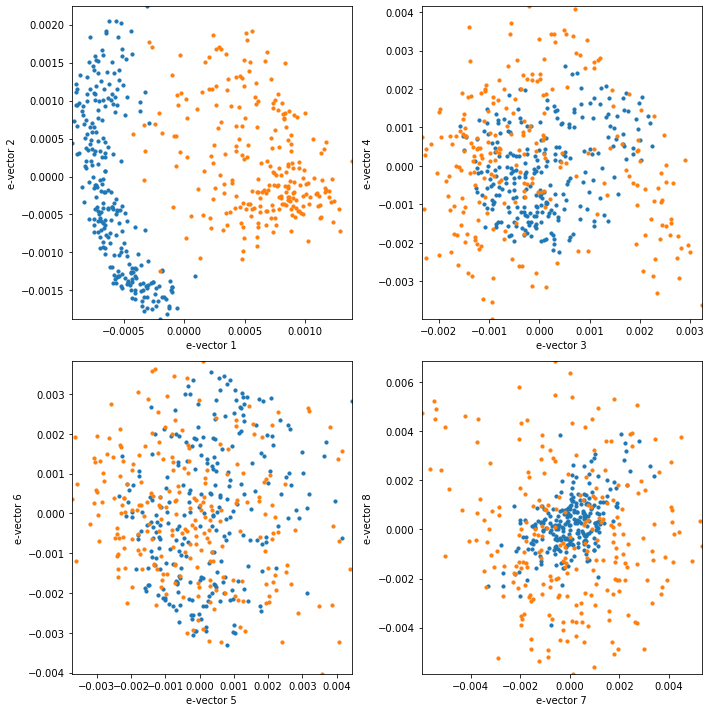

In [12]:
beta = kpca_kernel(Xt, Yt)
fig, ax = ax_plot_components(beta, Yt)
plt.tight_layout()
plt.savefig("../img/kpca_linear.eps")
plt.show()

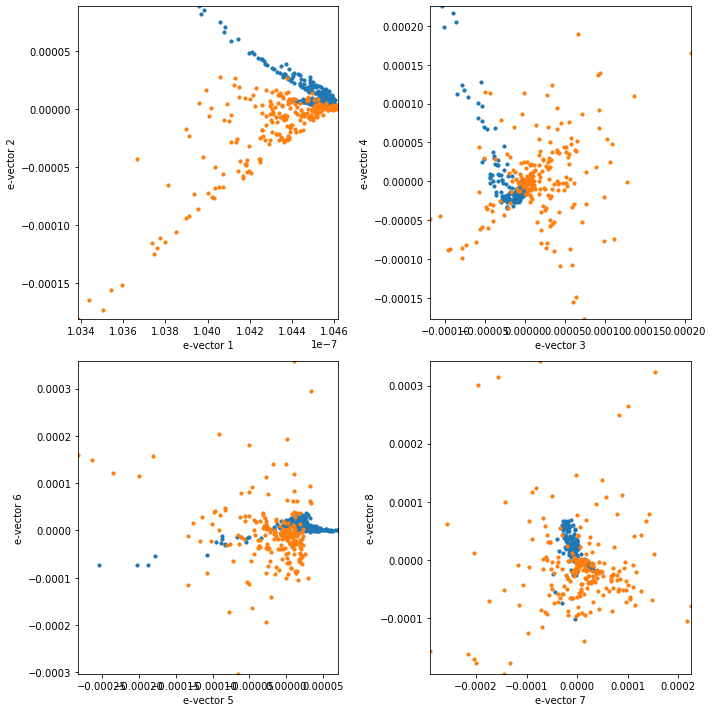

In [10]:
beta1 = kpca_kernel(Xt, Yt, kernel=lambda x,y: k_polynomial(x, y, 3))
fig, ax = ax_plot_components(beta1, Yt)
plt.tight_layout()
plt.savefig("../img/kpca_polynomial_3.eps")
plt.show()

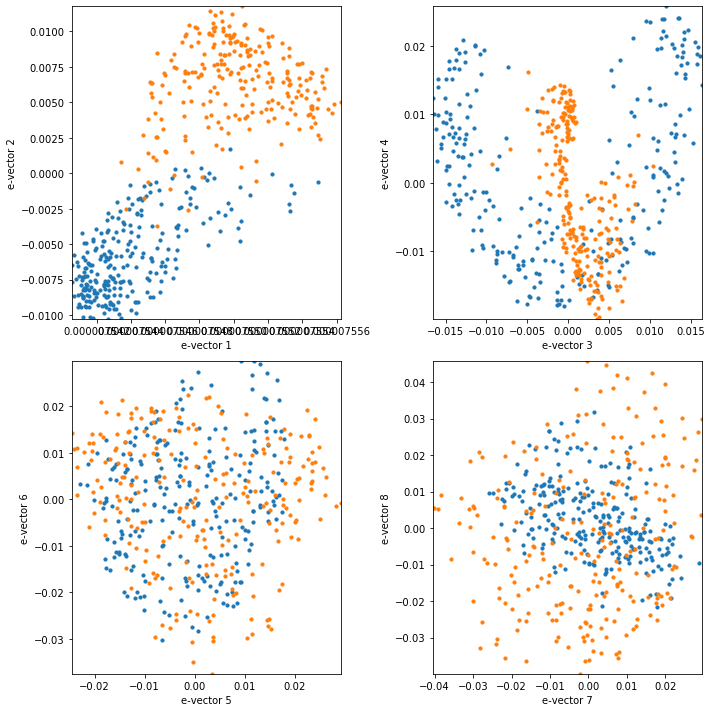

In [11]:
beta2 = kpca_kernel(Xt, Yt, kernel=lambda x,y: k_gaussian(x, y, 5))
fig, ax = ax_plot_components(beta2, Yt)
plt.tight_layout()
plt.savefig("../img/kpca_gaussian_5.eps")
plt.show()

In [13]:
from prob1 import *

(10, 21)
[-3.96726344e-09 -5.00463580e-09  1.33915427e-08  1.00060466e-08
  6.88667391e-09  2.21177605e-09 -9.24090234e-09  5.34570894e-09
  5.18902081e-09 -3.56495742e-08]


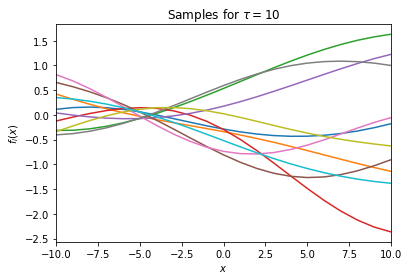

In [76]:
m = 10 # +/- range of X
tau = 10 # tau Gaussian kernel parameter
N = 10 # number of samples to draw

n = 2*m + 1
X = np.arange(-m, m+1) 
K = kernel_mat(lambda x,y: k_gaussian(x, y, tau), X)
fmean = K[:m+1, :].sum(axis=0)/11
Ksub = K[:m+1, :m+1]
Kc = np.zeros((n,n))
for i in range(0, n):
    for j in range(0, n):
            Kc[i, j] = K[i, j] - fmean[i] - fmean[j] + 1/(m+1)**2 * np.sum(Ksub)

#Kmean = np.tile(fmean, (11, 1))
#print(Kmean.shape)
#D = np.ones((n,n))  / (n)
#D[:m+2, :m+2] = 1/(m+1)
#I = np.eye(n)
#Kc = (I - D) @ K @ (I - D)
#Kc = K - Kmean
X, f0 = sample_functions(X, N, Kc)
print(f0.shape)
# check that the samples are centered
print(f0[:, :(m+1)].sum(axis=1)/(m+1))
#assert(np.any(np.finfo(np.float32).eps > np.abs(f0[:, :m+1].sum(axis=1)/(n+1))))

# plot results
figg, axg = plt.subplots()
plot_samples(axg, X, f0, r"Samples for $\tau = 10$")
axg.set_xlabel(r"$x$")

plt.savefig("../img/problem1.eps")
plt.show()